<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

# Задача

Попробуем предсказать отток клиентов из банка

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны.


In [1]:
from sklearn.metrics import roc_auc_score

# Первая часть. Исследование

In [250]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных 

In [251]:
data = pd.read_csv('train.csv')

In [252]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [253]:
# У нас 20 признаков
len(data.columns)

20

In [254]:
# Данные выглядят примерно так
data

ClientPeriod  MonthlySpending TotalSpent     Sex  IsSeniorCitizen  \
0               55            19.50    1026.35    Male                0   
1               72            25.85     1872.2    Male                0   
2                1            75.90       75.9    Male                0   
3               32            79.30       2570  Female                1   
4               60           115.25    6758.45  Female                0   
...            ...              ...        ...     ...              ...   
5277             3            30.40      82.15    Male                0   
5278            50            44.45    2188.45    Male                0   
5279             1            55.05      55.05    Male                0   
5280            29            76.00    2215.25  Female                0   
5281            19            75.90     1375.6  Female                0   

     HasPartner HasChild HasPhoneService HasMultiplePhoneNumbers  \
0           Yes      Yes             Yes                      No   
1           Yes       No             Yes                     Yes   
2            No       No             Yes                      No   
3           Yes       No             Yes                     Yes   
4           Yes      Yes             Yes                     Yes   
...         ...      ...             ...                     ...   
5277         No       No              No        No phone service   
5278        Yes       No              No        No phone service   
5279         No       No             Yes                      No   
5280         No       No             Yes                     Yes   
5281         No      Yes             Yes                     Yes   

     HasInternetService HasOnlineSecurityService      HasOnlineBackup  \
0                    No      No internet service  No internet service   
1                    No      No internet service  No internet service   
2           Fiber optic                       No                   No   
3           Fiber optic                       No                   No   
4           Fiber optic                      Yes                  Yes   
...                 ...                      ...                  ...   
5277                DSL                       No                   No   
5278                DSL                      Yes                   No   
5279                DSL                       No                   No   
5280        Fiber optic                       No                   No   
5281                DSL                      Yes                  Yes   

      HasDeviceProtection HasTechSupportAccess          HasOnlineTV  \
0     No internet service  No internet service  No internet service   
1     No internet service  No internet service  No internet service   
2                      No                  Yes                   No   
3                     Yes                   No                   No   
4                     Yes                  Yes                  Yes   
...                   ...                  ...                  ...   
5277                   No                  Yes                   No   
5278                   No                  Yes                  Yes   
5279                  Yes                  Yes                   No   
5280                   No                   No                   No   
5281                   No                  Yes                  Yes   

     HasMovieSubscription HasContractPhone IsBillingPaperless  \
0     No internet service         One year                 No   
1     No internet service         Two year                 No   
2                      No   Month-to-month                Yes   
3                      No   Month-to-month                 No   
4                     Yes         Two year                 No   
...                   ...              ...                ...   
5277                   No   Month-to-month                 No   
5278                   No         One 

In [255]:
# Посмотрим, что скажет о данных pandas - как видим, пропусков нет.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

## Анализ данных

1) Для численных призанков - гистограммы (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). 

2) Для категориальных - количество каждого значения для каждого признака. Для каждой колонки можно сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* 

3) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.


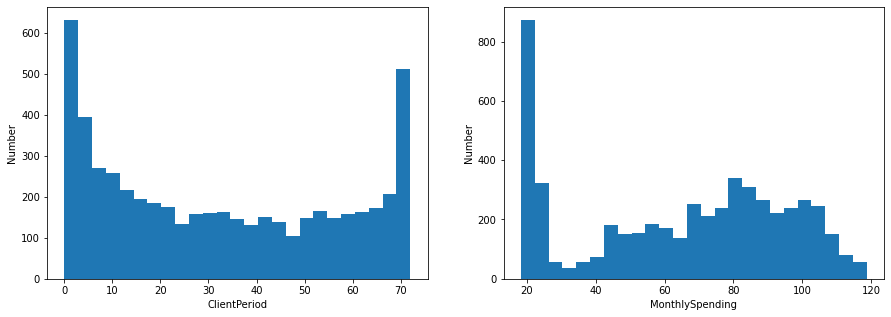

In [256]:
# Посмотрим на численные признаки

fig, axes = plt.subplots(1, 2, figsize = (15,5))
axes[0].hist(data['ClientPeriod'], bins = 25)
axes[0].set_xlabel('ClientPeriod')
axes[0].set_ylabel('Number')

axes[1].hist(data['MonthlySpending'],  bins = 25)
axes[1].set_xlabel('MonthlySpending')
axes[1].set_ylabel('Number')
pass

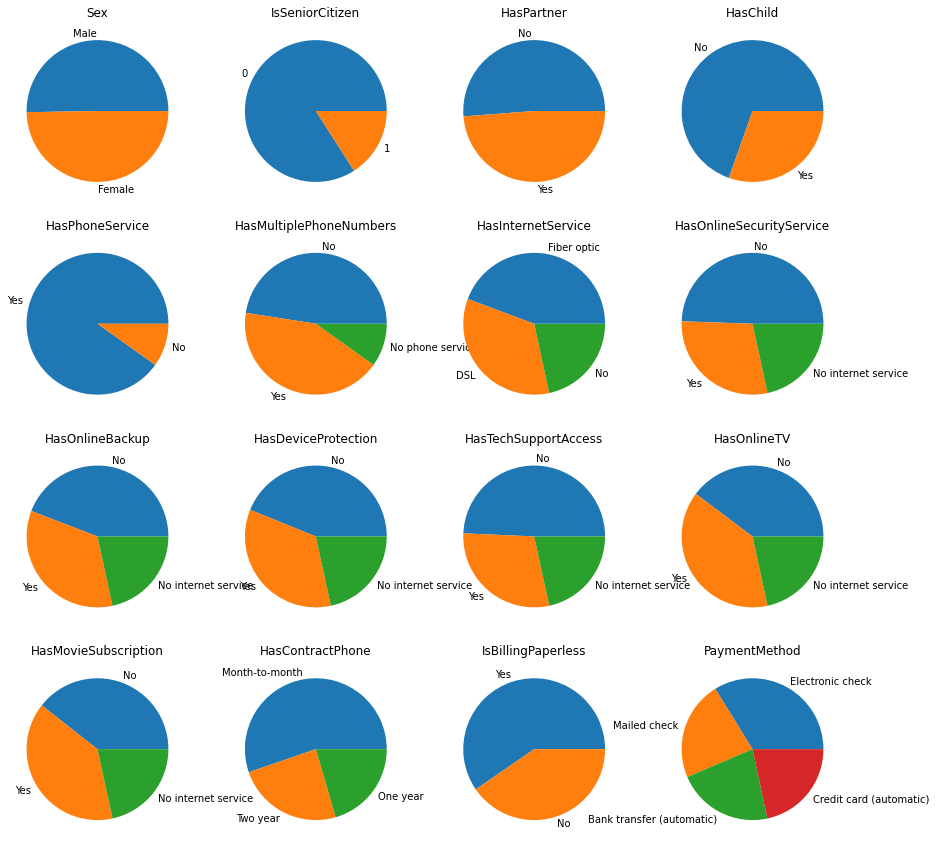

In [257]:
# Посмотрим на категориальные признаки
fig, axes = plt.subplots(4, 4, figsize = (15,15))
for i in range(4):
  for j in range(4):
    axes[i, j].pie(data[cat_cols[4*i+j]].value_counts(), labels = data[cat_cols[4*i+j]].value_counts().index)
    axes[i, j].set_title(cat_cols[4*i+j])
pass

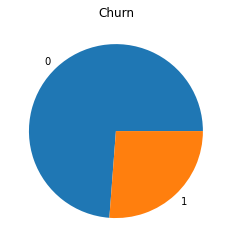

In [258]:
# Целевой признак
# Отношение классов примерно 1:3 - классы сбалансированы
plt.pie(data['Churn'].value_counts(), labels = data["Churn"].value_counts().index)
plt.title('Churn')
pass

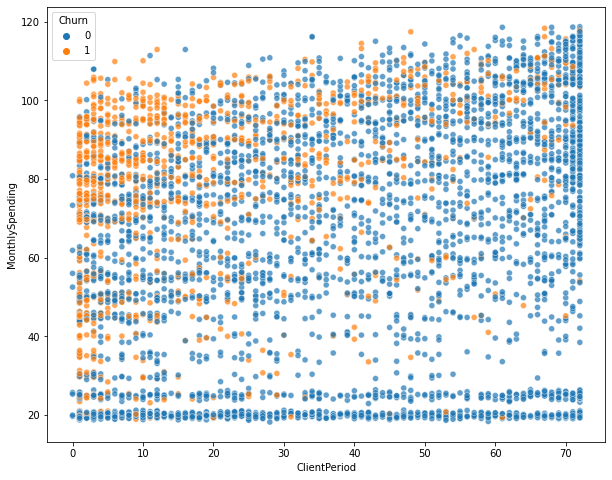

In [259]:
# Визуализируем что-нибудь еще
import seaborn as sns   

plt.figure(figsize = (10, 8))
sns.scatterplot(x='ClientPeriod', y='MonthlySpending', hue='Churn', data=data, alpha=0.7)
pass

Как видно из данного графика, в основном отток состоит из тех, кто является клиентом банка не долгое время или тратит много денег

## Применение линейных моделей 

1) Применить LogisticRegression. Перед этим - нормировка и one-hot-encoding. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируем разные значения гиперпараметра C и выберем лучший по метрике ROC-AUC. 

Преобразования данных и LogisticRegression соединяю в один Pipeline. Потом pipeline надо передаю в GridSearchCV.

In [260]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [261]:
# Подготовим y
y = data['Churn']
data = data.drop('Churn', axis=1)

In [262]:
# Категориальным признакам присвоим соответствующий тип
for c in cat_cols:
  data[c] = data[c].astype('category')

In [263]:
# Бинаризация номинальных признаков
bin_cat = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'IsBillingPaperless',
    ]
    
for c in bin_cat:
  data[c] = data[c].cat.codes

In [264]:
# One-hot encoding
not_bin_cat = [
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'PaymentMethod',
    ]
  
for c in not_bin_cat:
    data = pd.concat((data, pd.get_dummies(data[c], prefix=c, dtype='int8')), axis=1)
    data = data.drop([c], axis=1)

In [265]:
# Теперь категориальных признаков нет!
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   ClientPeriod                                  5282 non-null   int64  
 1   MonthlySpending                               5282 non-null   float64
 2   TotalSpent                                    5282 non-null   object 
 3   Sex                                           5282 non-null   int8   
 4   IsSeniorCitizen                               5282 non-null   int8   
 5   HasPartner                                    5282 non-null   int8   
 6   HasChild                                      5282 non-null   int8   
 7   HasPhoneService                               5282 non-null   int8   
 8   IsBillingPaperless                            5282 non-null   int8   
 9   HasMultiplePhoneNumbers_No                    5282 non-null   i

In [266]:
# Какая-то проблема с TotalSpent
# Оказывается, среди значений TotalSpent есть 9 примеров с пробелом 
filter = data['TotalSpent'].isin([' ']) 
data[filter]

ClientPeriod  MonthlySpending TotalSpent  Sex  IsSeniorCitizen  \
1048             0            25.75               1                0   
1707             0            73.35               0                0   
2543             0            19.70               1                0   
3078             0            80.85               0                0   
3697             0            20.00               0                0   
4002             0            61.90               1                0   
4326             0            25.35               1                0   
4551             0            52.55               0                0   
4598             0            56.05               0                0   

      HasPartner  HasChild  HasPhoneService  IsBillingPaperless  \
1048           1         1                1                   0   
1707           1         1                1                   0   
2543           1         1                1                   1   
3078           1         1                1                   0   
3697           1         1                1                   0   
4002           0         1                1                   1   
4326           1         1                1                   0   
4551           1         1                0                   1   
4598           1         1                0                   0   

      HasMultiplePhoneNumbers_No  ...  HasMovieSubscription_No  \
1048                           0  ...                        0   
1707                           0  ...                        1   
2543                           1  ...                        0   
3078                           1  ...                        0   
3697                           1  ...                        0   
4002                           0  ...                        1   
4326                           0  ...                        0   
4551                           0  ...                        1   
4598                           0  ...                        1   

      HasMovieSubscription_No internet service  HasMovieSubscription_Yes  \
1048                                         1                         0   
1707                                         0                         0   
2543                                         1                         0   
3078                                         0                         1   
3697                                         1                         0   
4002                                         0                         0   
4326                                         1                         0   
4551                                         0                         0   
4598                                         0                         0   

      HasContractPhone_Month-to-month  HasContractPhone_One year  \
1048                                0                          0   
1707                                0                          0   
2543                                0                          1   
3078                                0                          0   
3697                                0                          0   
4002                                0                          0   
4326                                0                          0   
4551                                0                          0   
4598                                0                          0   

      HasContractPhone_Two year  PaymentMethod_Bank transfer (automatic)  \
1048                          1                                        0   
1707                          1                                        0   
2543                          0                                        0   
3078                          1                                        0   
3697                          1                                        0   
4002                          1                        

In [267]:
# Заменяем пробелы на NaN
data = data.replace(" ", np.nan)

In [268]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# Создадим pipeline

In [269]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [270]:
pipe = Pipeline([('SimpleImputer', imputer), ('scaler', StandardScaler()), 
                 ('model', LogisticRegression())])

In [271]:
grid = GridSearchCV(pipe, 
                    {
                    'model__C': [100, 10, 5, 3, 1, 0.5, 0.1, 0.01, 0.001],
                    }, 
                    cv=StratifiedKFold(5, shuffle=True, random_state=42),
                    scoring = 'roc_auc'
                    )

In [272]:
grid.fit(data, y)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('SimpleImputer', SimpleImputer()),
                                       ('scaler', StandardScaler()),
                                       ('model', LogisticRegression())]),
             param_grid={'model__C': [100, 10, 5, 3, 1, 0.5, 0.1, 0.01, 0.001]},
             scoring='roc_auc')

In [273]:
grid.best_params_

{'model__C': 5}

In [274]:
grid.cv_results_

{'mean_fit_time': array([0.11555037, 0.11240706, 0.11761065, 0.11665425, 0.11092534,
        0.11101542, 0.10379725, 0.08863602, 0.07558589]),
 'mean_score_time': array([0.01201606, 0.01202173, 0.01262512, 0.01249261, 0.01250052,
        0.01218839, 0.01245337, 0.01227851, 0.01204906]),
 'mean_test_score': array([0.84479809, 0.84484445, 0.84487689, 0.84486026, 0.84484005,
        0.84470399, 0.84406615, 0.84215385, 0.83788506]),
 'param_model__C': masked_array(data=[100, 10, 5, 3, 1, 0.5, 0.1, 0.01, 0.001],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'model__C': 100},
  {'model__C': 10},
  {'model__C': 5},
  {'model__C': 3},
  {'model__C': 1},
  {'model__C': 0.5},
  {'model__C': 0.1},
  {'model__C': 0.01},
  {'model__C': 0.001}],
 'rank_test_score': array([5, 3, 1, 2, 4, 6, 7, 8, 9], dtype=int32),
 'split0_test_score': array([0.84198139, 0.84196751, 0.84193511, 0

Получили значение метрики AUC-ROC равное  0.84487689 при значении параметра С = 5


In [275]:
# Сделаем предсказание для файла test.csv
valid =pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

In [276]:
# Категориальным признакам присвоим соответствующий тип
for c in cat_cols:
  valid[c] = valid[c].astype('category')

# Бинаризация номинальных признаков
bin_cat = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'IsBillingPaperless',
    ]
    
for c in bin_cat:
  valid[c] = valid[c].cat.codes

# One-hot encoding
not_bin_cat = [
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'PaymentMethod',
    ]
  
for c in not_bin_cat:
    valid = pd.concat((valid, pd.get_dummies(valid[c], prefix=c, dtype='int8')), axis=1)
    valid = valid.drop([c], axis=1)

In [277]:
# Заменяем пробелы на NaN
valid = valid.replace(" ", np.nan)

In [278]:
submission['Churn'] = grid.best_estimator_.predict_proba(valid)[:, 1]

In [280]:
submission.to_csv('my_submission1.csv', index=False)

На kaggle это решение имеет оценку Score: 0.84574 <br>
Ссылка на соревнование: https://www.kaggle.com/competitions/advanced-dls-spring-2021

## Применение градиентного бустинга 

Часто градиентный бустинг с дефолтными параметрами даёт 80% результата за 0% усилий.

Используем catboost, поэтому не надо кодировать категориальные признаки - catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Протестируем catboost cо стандартными параметрами.

2) Протестируем разные значения параметра количества деревьев и learning_rate'а 

In [99]:
pip install catboost

     |████████████████████████████████| 76.1 MB 65 kB/s 


In [100]:
from catboost import CatBoostClassifier

In [281]:
data = pd.read_csv('train.csv')

In [282]:
# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [283]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Churn', axis=1), data['Churn'], test_size=0.2)

In [284]:
boost = CatBoostClassifier(iterations = 100,   #количество повторений
                           eval_metric = 'AUC',   #метрика
                           ) 

In [285]:
# Обучимся со стандартными параметрами
boost.fit(X_train, y_train, eval_set=[(X_test, y_test)], use_best_model=True, cat_features=cat_cols)

Learning rate set to 0.123165
0:	test: 0.7934157	best: 0.7934157 (0)	total: 5.69ms	remaining: 563ms
1:	test: 0.8176436	best: 0.8176436 (1)	total: 15.8ms	remaining: 775ms
2:	test: 0.8274971	best: 0.8274971 (2)	total: 22.9ms	remaining: 741ms
3:	test: 0.8299908	best: 0.8299908 (3)	total: 37.3ms	remaining: 896ms
4:	test: 0.8324205	best: 0.8324205 (4)	total: 45.4ms	remaining: 863ms
5:	test: 0.8300252	best: 0.8324205 (4)	total: 51.1ms	remaining: 801ms
6:	test: 0.8290940	best: 0.8324205 (4)	total: 56.2ms	remaining: 746ms
7:	test: 0.8308053	best: 0.8324205 (4)	total: 61.1ms	remaining: 703ms
8:	test: 0.8384077	best: 0.8384077 (8)	total: 66.2ms	remaining: 669ms
9:	test: 0.8412674	best: 0.8412674 (9)	total: 71.3ms	remaining: 642ms
10:	test: 0.8444086	best: 0.8444086 (10)	total: 76.2ms	remaining: 617ms
11:	test: 0.8460695	best: 0.8460695 (11)	total: 81.1ms	remaining: 595ms
12:	test: 0.8480920	best: 0.8480920 (12)	total: 86.1ms	remaining: 577ms
13:	test: 0.8480874	best: 0.8480920 (12)	total: 91.1ms

In [286]:
boost = CatBoostClassifier(iterations=100,   #количество повторений
                           eval_metric = 'AUC',   #метрика
                           loss_function='Logloss',  #функция потерь
                          ) 
grid = GridSearchCV(boost, 
                    {
                    'depth': [3, 4, 5, 6],
                    'learning_rate': [0.01, 0.05, 0.1, 0.15]
                    }, 
                    cv=StratifiedKFold(5, shuffle=True, random_state=42))

In [287]:
grid.fit(X_train, y_train, eval_set=[(X_test, y_test)], cat_features=cat_cols)

Выходные данные были обрезаны до нескольких последних строк (5000).
22:	test: 0.8550583	best: 0.8550583 (22)	total: 87.4ms	remaining: 293ms
23:	test: 0.8550400	best: 0.8550583 (22)	total: 91.1ms	remaining: 289ms
24:	test: 0.8549234	best: 0.8550583 (22)	total: 95.3ms	remaining: 286ms
25:	test: 0.8553489	best: 0.8553489 (25)	total: 99.5ms	remaining: 283ms
26:	test: 0.8552734	best: 0.8553489 (25)	total: 103ms	remaining: 278ms
27:	test: 0.8552048	best: 0.8553489 (25)	total: 106ms	remaining: 272ms
28:	test: 0.8551224	best: 0.8553489 (25)	total: 109ms	remaining: 267ms
29:	test: 0.8559757	best: 0.8559757 (29)	total: 113ms	remaining: 263ms
30:	test: 0.8565569	best: 0.8565569 (30)	total: 115ms	remaining: 255ms
31:	test: 0.8572157	best: 0.8572157 (31)	total: 118ms	remaining: 251ms
32:	test: 0.8575955	best: 0.8575955 (32)	total: 121ms	remaining: 246ms
33:	test: 0.8575726	best: 0.8575955 (32)	total: 124ms	remaining: 241ms
34:	test: 0.8576321	best: 0.8576321 (34)	total: 127ms	remaining: 235ms
35:	t

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x7f10e82dc650>,
             param_grid={'depth': [3, 4, 5, 6],
                         'learning_rate': [0.01, 0.05, 0.1, 0.15]})

In [288]:
grid.best_params_

{'depth': 3, 'learning_rate': 0.05}

# Предсказания

In [289]:
best_model = grid.best_estimator_

In [290]:
valid =pd.read_csv('test.csv')
submission = pd.read_csv('submission.csv')

submission['Churn'] = best_model.predict_proba(valid)[:, 1]

submission.to_csv('my_submission2.csv', index=False)

Это решение оценено на kaggle Score: 0.85129

Ник на kaggle: irusl_1337, team: Ruslan Izmailov
